In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [6]:
houses = pd.read_csv("C:\\Users\\ishan\\MLProjects\\House_Price_Prediction\\hyd_v2.csv")

In [9]:
houses.head()

,active,amenities,balconies,bathroom,combineDescription,completeStreetName,deposit,facing,facingDesc,floor,...,property_size,reactivationSource,rent_amount,sharedAccomodation,shortUrl,swimmingPool,totalFloor,type_bhk,waterSupply,weight
0,True,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",3.0,3,NaN,"Shreya carnation, Block I, NCB Enclave, Gachib...",90000,W,West,3,...,2200,USER_DASHBOARD,28000,False,http://nobr.kr/sv/9Kvqj,False,5,BHK3,CORP_BORE,NaN
1,True,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",1.0,2,NaN,"Inner Ring Rd, near RTO Bandlaguda South Zone",45000,E,East,2,...,1200,USER_DASHBOARD,15000,False,http://nobr.kr/sv/j2pD6,False,2,BHK3,BOREWELL,NaN
2,True,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",3.0,3,NaN,"Rd Number 2, Shirdi Sai Nagar, Manikonda, Hyde...",80000,E,East,0,...,1800,MISSED_CALL,16000,False,http://nobr.kr/sv/TXJmj,False,3,BHK3,CORP_BORE,NaN
3,True,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",1.0,2,NaN,"Plot No. 44, Road No. 1/A, kakatiya colony, LB...",18000,W,West,2,...,750,MISSED_CALL,9000,False,http://nobr.kr/sv/FnCsf,False,2,BHK2,CORP_BORE,NaN
4,True,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",2.0,2,NaN,"Madhapur HUDA Techno Enclave, Near MaxCure Su...",80000,E,East,2,...,1250,NaN,32500,False,http://nobr.kr/sv/BQFRb,False,5,BHK2,CORP_BORE,NaN


In [10]:
houses.shape

(19110, 36)

In [11]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19110 entries, 0 to 19109
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   active              19110 non-null  bool   
 1   amenities           18938 non-null  object 
 2   balconies           9574 non-null   float64
 3   bathroom            19110 non-null  int64  
 4   combineDescription  0 non-null      float64
 5   completeStreetName  19108 non-null  object 
 6   deposit             19110 non-null  int64  
 7   facing              9569 non-null   object 
 8   facingDesc          9569 non-null   object 
 9   floor               19110 non-null  int64  
 10  furnishingDesc      19110 non-null  object 
 11  gym                 19110 non-null  bool   
 12  id                  19110 non-null  object 
 13  isMaintenance       19110 non-null  bool   
 14  lift                19110 non-null  bool   
 15  loanAvailable       19110 non-null  bool   
 16  loca

In [12]:
houses.isnull().sum()

active                    0
amenities               172
balconies              9536
bathroom                  0
combineDescription    19110
completeStreetName        2
deposit                   0
facing                 9541
facingDesc             9541
floor                     0
furnishingDesc            0
gym                       0
id                        0
isMaintenance             0
lift                      0
loanAvailable             0
locality                  6
localityId                0
location                  0
maintenanceAmount      9658
ownerName                 1
parking                   0
parkingDesc             950
propertyTitle             0
propertyType              0
property_age              0
property_size             0
reactivationSource     9916
rent_amount               0
sharedAccomodation        0
shortUrl                  0
swimmingPool              0
totalFloor                0
type_bhk                  0
waterSupply            9224
weight              

In [16]:
houses['waterSupply'].value_counts()

waterSupply
CORP_BORE      6965
CORPORATION    1586
BOREWELL       1335
Name: count, dtype: int64

In [17]:
houses['waterSupply'].isnull().sum()

9224

In [18]:
houses['waterSupply'] = houses['waterSupply'].fillna('No_Supply')

In [19]:
houses['waterSupply'].value_counts()

waterSupply
No_Supply      9224
CORP_BORE      6965
CORPORATION    1586
BOREWELL       1335
Name: count, dtype: int64

In [20]:
houses.isnull().sum()

active                    0
amenities               172
balconies              9536
bathroom                  0
combineDescription    19110
completeStreetName        2
deposit                   0
facing                 9541
facingDesc             9541
floor                     0
furnishingDesc            0
gym                       0
id                        0
isMaintenance             0
lift                      0
loanAvailable             0
locality                  6
localityId                0
location                  0
maintenanceAmount      9658
ownerName                 1
parking                   0
parkingDesc             950
propertyTitle             0
propertyType              0
property_age              0
property_size             0
reactivationSource     9916
rent_amount               0
sharedAccomodation        0
shortUrl                  0
swimmingPool              0
totalFloor                0
type_bhk                  0
waterSupply               0
weight              

In [21]:
print(houses['reactivationSource'])

0             USER_DASHBOARD
1             USER_DASHBOARD
2                MISSED_CALL
3                MISSED_CALL
4                        NaN
5                MISSED_CALL
6                        NaN
7                        NaN
8         PROPERTY_DASHBOARD
9                MISSED_CALL
10                     OWNER
11                       NaN
12            USER_DASHBOARD
13                       NaN
14                     OWNER
15        PROPERTY_DASHBOARD
16               MISSED_CALL
17        PROPERTY_DASHBOARD
18        PROPERTY_DASHBOARD
19                       NaN
20        PROPERTY_DASHBOARD
21        PROPERTY_DASHBOARD
22                       NaN
23                       NaN
24                       NaN
25            USER_DASHBOARD
26                       NaN
27            USER_DASHBOARD
28            USER_DASHBOARD
29            USER_DASHBOARD
30        PROPERTY_DASHBOARD
31            USER_DASHBOARD
32                       NaN
33        PROPERTY_DASHBOARD
34        PROP

In [22]:
print(houses['parkingDesc'])

0        Bike and Car
1                Bike
2        Bike and Car
3        Bike and Car
4        Bike and Car
5        Bike and Car
6        Bike and Car
7        Bike and Car
8        Bike and Car
9                Bike
10       Bike and Car
11               Bike
12                Car
13       Bike and Car
14               Bike
15               Bike
16       Bike and Car
17       Bike and Car
18       Bike and Car
19       Bike and Car
20                Car
21                Car
22       Bike and Car
23       Bike and Car
24                Car
25               Bike
26       Bike and Car
27       Bike and Car
28                Car
29       Bike and Car
30       Bike and Car
31       Bike and Car
32       Bike and Car
33       Bike and Car
34       Bike and Car
35       Bike and Car
36       Bike and Car
37       Bike and Car
38       Bike and Car
39       Bike and Car
40       Bike and Car
41       Bike and Car
42       Bike and Car
43       Bike and Car
44       Bike and Car
45       B

In [23]:
houses['parkingDesc'].value_counts()

parkingDesc
Bike and Car    9599
Bike            7430
Car             1131
Name: count, dtype: int64

In [24]:
houses['parkingDesc'].isnull().sum()

950

In [25]:
houses['parkingDesc'] = houses['parkingDesc'].fillna('No_Parking')

In [26]:
houses['parkingDesc'].isnull().sum()

0

In [27]:
houses['parkingDesc'].value_counts()

parkingDesc
Bike and Car    9599
Bike            7430
Car             1131
No_Parking       950
Name: count, dtype: int64

In [28]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19110 entries, 0 to 19109
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   active              19110 non-null  bool   
 1   amenities           18938 non-null  object 
 2   balconies           9574 non-null   float64
 3   bathroom            19110 non-null  int64  
 4   combineDescription  0 non-null      float64
 5   completeStreetName  19108 non-null  object 
 6   deposit             19110 non-null  int64  
 7   facing              9569 non-null   object 
 8   facingDesc          9569 non-null   object 
 9   floor               19110 non-null  int64  
 10  furnishingDesc      19110 non-null  object 
 11  gym                 19110 non-null  bool   
 12  id                  19110 non-null  object 
 13  isMaintenance       19110 non-null  bool   
 14  lift                19110 non-null  bool   
 15  loanAvailable       19110 non-null  bool   
 16  loca

In [29]:
houses.isnull().sum()

active                    0
amenities               172
balconies              9536
bathroom                  0
combineDescription    19110
completeStreetName        2
deposit                   0
facing                 9541
facingDesc             9541
floor                     0
furnishingDesc            0
gym                       0
id                        0
isMaintenance             0
lift                      0
loanAvailable             0
locality                  6
localityId                0
location                  0
maintenanceAmount      9658
ownerName                 1
parking                   0
parkingDesc               0
propertyTitle             0
propertyType              0
property_age              0
property_size             0
reactivationSource     9916
rent_amount               0
sharedAccomodation        0
shortUrl                  0
swimmingPool              0
totalFloor                0
type_bhk                  0
waterSupply               0
weight              

In [30]:
houses['balconies'].value_counts()

balconies
1.0      4614
2.0      3434
0.0       773
3.0       654
4.0        83
5.0        11
110.0       2
120.0       1
12.0        1
6.0         1
Name: count, dtype: int64

In [31]:
print(houses['balconies'])

0          3.0
1          1.0
2          3.0
3          1.0
4          2.0
5          3.0
6          1.0
7          2.0
8          0.0
9          2.0
10         1.0
11         1.0
12         2.0
13         2.0
14         1.0
15         2.0
16         2.0
17         1.0
18         2.0
19         1.0
20         1.0
21         1.0
22         3.0
23         2.0
24         2.0
25         1.0
26         NaN
27         3.0
28         1.0
29         0.0
30         2.0
31         3.0
32         1.0
33         2.0
34         1.0
35         2.0
36         NaN
37         1.0
38         1.0
39         2.0
40         3.0
41         2.0
42         2.0
43         1.0
44         3.0
45         2.0
46         2.0
47         1.0
48         2.0
49         1.0
50         1.0
51         1.0
52         2.0
53         1.0
54         1.0
55         2.0
56         2.0
57         1.0
58         1.0
59         1.0
60         2.0
61         3.0
62         3.0
63         3.0
64         0.0
65         2.0
66        

In [32]:
houses['balconies'] = houses['balconies'].fillna(0.0)

In [33]:
houses['balconies'].value_counts()

balconies
0.0      10309
1.0       4614
2.0       3434
3.0        654
4.0         83
5.0         11
110.0        2
120.0        1
12.0         1
6.0          1
Name: count, dtype: int64

In [34]:
print(houses[houses['balconies']>=5])

       active                                          amenities  balconies  \
627      True  {"LIFT":false,"GYM":false,"INTERNET":false,"AC...        5.0   
2318     True  {"LIFT":false,"GYM":false,"INTERNET":false,"AC...      120.0   
2969     True  {"LIFT":false,"GYM":false,"INTERNET":true,"AC"...        5.0   
3863     True  {"LIFT":true,"GYM":false,"INTERNET":false,"AC"...        5.0   
9195     True  {"INTERCOM":false,"AC":false,"RWH":false,"HK":...        5.0   
9837     True  {"LIFT":false,"GYM":false,"INTERNET":false,"AC...        5.0   
10721    True  {"LIFT":true,"GYM":false,"INTERNET":false,"AC"...        5.0   
10845    True  {"LIFT":true,"GYM":false,"INTERNET":false,"AC"...        5.0   
13393    True  {"INTERCOM":false,"AC":true,"RWH":false,"HK":f...       12.0   
14395    True  {"LIFT":true,"GYM":false,"INTERNET":true,"AC":...        6.0   
15080    True  {"LIFT":true,"GYM":false,"INTERNET":false,"AC"...        5.0   
15206    True  {"LIFT":false,"GYM":false,"INTERNET":

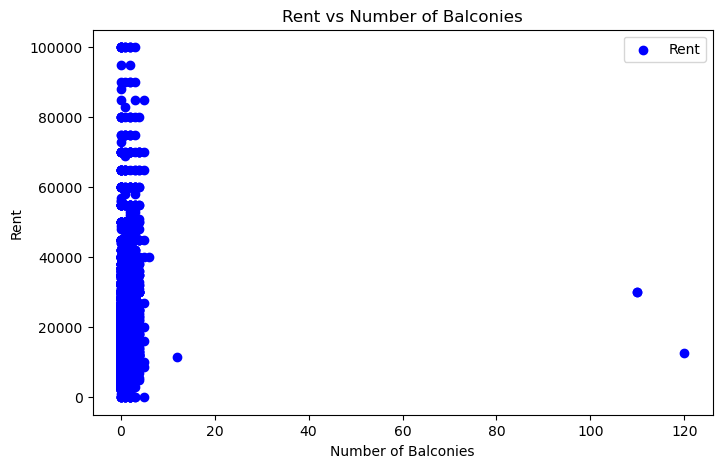

In [37]:
import matplotlib.pyplot as plt

# Plotting rent vs number of balconies
plt.figure(figsize=(8, 5))
plt.scatter(houses['balconies'], houses['rent_amount'], color='blue', label='Rent')

# Add titles and labels
plt.title('Rent vs Number of Balconies')
plt.xlabel('Number of Balconies')
plt.ylabel('Rent')

# Optionally, you can connect the points with a line
#plt.plot(df['balconies'], df['rent'], color='blue', linestyle='--')

# Show the plot
plt.legend()
plt.show()


In [39]:
clean_house = houses[houses['balconies']<10]

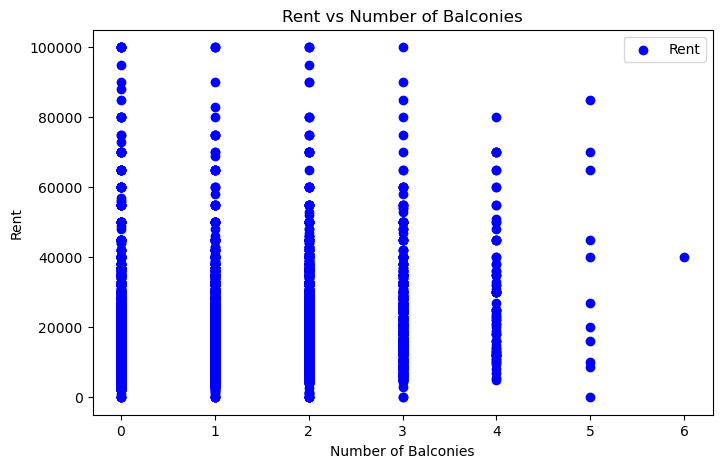

In [40]:
import matplotlib.pyplot as plt

# Plotting rent vs number of balconies
plt.figure(figsize=(8, 5))
plt.scatter(clean_house['balconies'], clean_house['rent_amount'], color='blue', label='Rent')

# Add titles and labels
plt.title('Rent vs Number of Balconies')
plt.xlabel('Number of Balconies')
plt.ylabel('Rent')

# Optionally, you can connect the points with a line
#plt.plot(df['balconies'], df['rent'], color='blue', linestyle='--')

# Show the plot
plt.legend()
plt.show()


In [41]:
clean_house.isnull().sum()

active                    0
amenities               172
balconies                 0
bathroom                  0
combineDescription    19106
completeStreetName        2
deposit                   0
facing                 9541
facingDesc             9541
floor                     0
furnishingDesc            0
gym                       0
id                        0
isMaintenance             0
lift                      0
loanAvailable             0
locality                  6
localityId                0
location                  0
maintenanceAmount      9655
ownerName                 1
parking                   0
parkingDesc               0
propertyTitle             0
propertyType              0
property_age              0
property_size             0
reactivationSource     9914
rent_amount               0
sharedAccomodation        0
shortUrl                  0
swimmingPool              0
totalFloor                0
type_bhk                  0
waterSupply               0
weight              

In [42]:
clean_house['maintenanceAmount'] = clean_house['maintenanceAmount'].fillna(0)

C:\Users\ishan\AppData\Local\Temp\ipykernel_12684\41623662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_house['maintenanceAmount'] = clean_house['maintenanceAmount'].fillna(0)


In [43]:
houses = houses[houses['balconies']<=10]

In [44]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19106 entries, 0 to 19109
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   active              19106 non-null  bool   
 1   amenities           18934 non-null  object 
 2   balconies           19106 non-null  float64
 3   bathroom            19106 non-null  int64  
 4   combineDescription  0 non-null      float64
 5   completeStreetName  19104 non-null  object 
 6   deposit             19106 non-null  int64  
 7   facing              9565 non-null   object 
 8   facingDesc          9565 non-null   object 
 9   floor               19106 non-null  int64  
 10  furnishingDesc      19106 non-null  object 
 11  gym                 19106 non-null  bool   
 12  id                  19106 non-null  object 
 13  isMaintenance       19106 non-null  bool   
 14  lift                19106 non-null  bool   
 15  loanAvailable       19106 non-null  bool   
 16  locality 

In [45]:
houses['balconies'].value_counts()

balconies
0.0    10309
1.0     4614
2.0     3434
3.0      654
4.0       83
5.0       11
6.0        1
Name: count, dtype: int64

In [46]:
clean_house.isnull().sum()

active                    0
amenities               172
balconies                 0
bathroom                  0
combineDescription    19106
completeStreetName        2
deposit                   0
facing                 9541
facingDesc             9541
floor                     0
furnishingDesc            0
gym                       0
id                        0
isMaintenance             0
lift                      0
loanAvailable             0
locality                  6
localityId                0
location                  0
maintenanceAmount         0
ownerName                 1
parking                   0
parkingDesc               0
propertyTitle             0
propertyType              0
property_age              0
property_size             0
reactivationSource     9914
rent_amount               0
sharedAccomodation        0
shortUrl                  0
swimmingPool              0
totalFloor                0
type_bhk                  0
waterSupply               0
weight              

In [47]:
houses = houses.drop('combineDescription', axis=1)

In [48]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19106 entries, 0 to 19109
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   active              19106 non-null  bool   
 1   amenities           18934 non-null  object 
 2   balconies           19106 non-null  float64
 3   bathroom            19106 non-null  int64  
 4   completeStreetName  19104 non-null  object 
 5   deposit             19106 non-null  int64  
 6   facing              9565 non-null   object 
 7   facingDesc          9565 non-null   object 
 8   floor               19106 non-null  int64  
 9   furnishingDesc      19106 non-null  object 
 10  gym                 19106 non-null  bool   
 11  id                  19106 non-null  object 
 12  isMaintenance       19106 non-null  bool   
 13  lift                19106 non-null  bool   
 14  loanAvailable       19106 non-null  bool   
 15  locality            19100 non-null  object 
 16  localityI

In [51]:
houses.isnull().sum()

active                    0
amenities               172
balconies                 0
bathroom                  0
completeStreetName        2
deposit                   0
facing                 9541
facingDesc             9541
floor                     0
furnishingDesc            0
gym                       0
id                        0
isMaintenance             0
lift                      0
loanAvailable             0
locality                  6
localityId                0
location                  0
maintenanceAmount         0
ownerName                 1
parking                   0
parkingDesc               0
propertyTitle             0
propertyType              0
property_age              0
property_size             0
reactivationSource     9914
rent_amount               0
sharedAccomodation        0
shortUrl                  0
swimmingPool              0
totalFloor                0
type_bhk                  0
waterSupply               0
weight                19106
dtype: int64

In [50]:
houses['maintenanceAmount'] = houses['maintenanceAmount'].fillna(0)

In [52]:
houses['amenities'].value_counts()

amenities
{"LIFT":false,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":false,"FS":false,"SERVANT":false,"SECURITY":false,"SC":false,"GP":false,"PARK":false,"RWH":false,"STP":false,"HK":false,"PB":false,"VP":false}    6463
{"LIFT":false,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":false,"FS":false,"SERVANT":false,"SECURITY":true,"SC":false,"GP":false,"PARK":false,"RWH":false,"STP":false,"HK":false,"PB":false,"VP":false}     2577
{"LIFT":true,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":false,"FS":false,"SERVANT":false,"SECURITY":true,"SC":false,"GP":false,"PARK":false,"RWH":false,"STP":false,"HK":false,"PB":false,"VP":false}      1507
{"INTERCOM":false,"AC":false,"RWH":false,"HK":false,"INTERNET":false,"LIFT":false,"CLUB":false,"GP":false,"FS":false,"STP":false,"PARK":false,"SC":false,"PB":false,"CPA":false,"SECURITY":false,"POOL":false,"GYM":false,"VP":false

In [53]:
houses = houses.dropna(subset=['amenities'])

In [54]:
houses = houses.dropna(subset=['completeStreetName'])

In [55]:
houses.isnull().sum()

active                    0
amenities                 0
balconies                 0
bathroom                  0
completeStreetName        0
deposit                   0
facing                 9532
facingDesc             9532
floor                     0
furnishingDesc            0
gym                       0
id                        0
isMaintenance             0
lift                      0
loanAvailable             0
locality                  6
localityId                0
location                  0
maintenanceAmount         0
ownerName                 1
parking                   0
parkingDesc               0
propertyTitle             0
propertyType              0
property_age              0
property_size             0
reactivationSource     9764
rent_amount               0
sharedAccomodation        0
shortUrl                  0
swimmingPool              0
totalFloor                0
type_bhk                  0
waterSupply               0
weight                18932
dtype: int64

In [56]:
houses = houses.drop(columns=['weight'], axis=1)

In [57]:
houses.isnull().sum()

active                   0
amenities                0
balconies                0
bathroom                 0
completeStreetName       0
deposit                  0
facing                9532
facingDesc            9532
floor                    0
furnishingDesc           0
gym                      0
id                       0
isMaintenance            0
lift                     0
loanAvailable            0
locality                 6
localityId               0
location                 0
maintenanceAmount        0
ownerName                1
parking                  0
parkingDesc              0
propertyTitle            0
propertyType             0
property_age             0
property_size            0
reactivationSource    9764
rent_amount              0
sharedAccomodation       0
shortUrl                 0
swimmingPool             0
totalFloor               0
type_bhk                 0
waterSupply              0
dtype: int64

In [59]:
face = houses[houses['facing'].notna()]

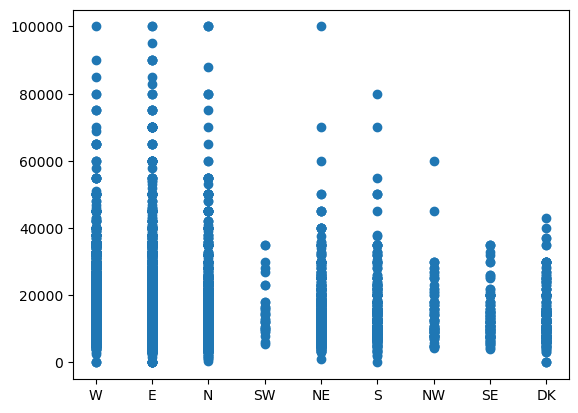

In [60]:
plt.scatter(face['facing'], face['rent_amount'])
plt.show()

In [61]:
ras = houses[houses['reactivationSource'].notna()]

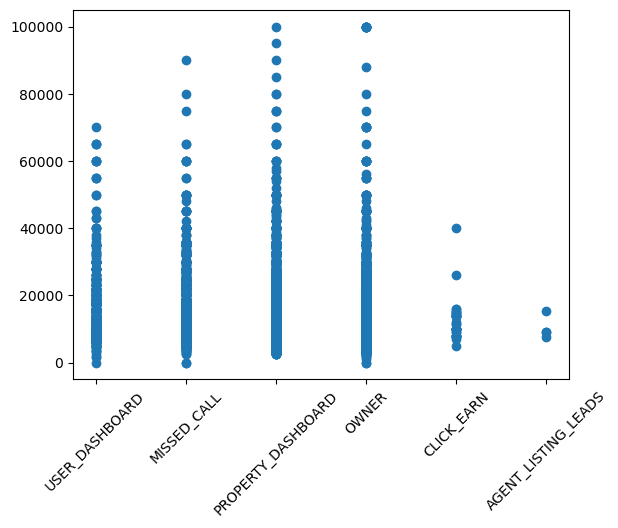

In [63]:
plt.scatter(ras['reactivationSource'], ras['rent_amount'])
plt.xticks(rotation=45)
plt.show()

In [65]:
feature_avg_price = ras.groupby('reactivationSource')['rent_amount'].mean()
print(feature_avg_price)

reactivationSource
AGENT_LISTING_LEADS    10250.000000
CLICK_EARN             12485.294118
MISSED_CALL            16152.997859
OWNER                  14703.189641
PROPERTY_DASHBOARD     14482.562956
USER_DASHBOARD         16855.882353
Name: rent_amount, dtype: float64


In [66]:
import scipy.stats as stats

# Perform ANOVA to check if the differences are significant
anova_result = stats.f_oneway(
    ras[ras['reactivationSource'] == 'AGENT_LISTING_LEADS']['rent_amount'],
    ras[ras['reactivationSource'] == 'CLICK_EARN']['rent_amount'],
    ras[ras['reactivationSource'] == 'MISSED_CALL']['rent_amount'],
    ras[ras['reactivationSource'] == 'OWNER']['rent_amount'],
    ras[ras['reactivationSource'] == 'PROPERTY_DASHBOARD']['rent_amount'],
    ras[ras['reactivationSource'] == 'USER_DASHBOARD']['rent_amount']
)

print(anova_result)


F_onewayResult(statistic=9.9187773368989, pvalue=1.7802437842550282e-09)


In [67]:
# Assuming the price column is named 'rent_amount'
facing_price_stats = face.groupby('facing')['rent_amount'].describe()
print(facing_price_stats)

         count          mean           std     min      25%      50%      75%  \
facing                                                                          
DK       235.0  14073.868085   7744.166725     0.0   8000.0  12000.0  18750.0   
E       4413.0  16520.165420  10773.883776     0.0   9500.0  14000.0  20000.0   
N       1683.0  15261.288176  10306.697474   500.0   9000.0  13000.0  18000.0   
NE       707.0  15236.207921   8886.799304  1000.0   9000.0  13500.0  19500.0   
NW        77.0  15320.649351   9422.446092  4190.0   9000.0  12500.0  20000.0   
S        312.0  15353.201923   9986.678829     0.0   9000.0  12000.0  18500.0   
SE       100.0  14108.000000   7282.311210  4000.0   9000.0  12000.0  17250.0   
SW        32.0  15953.125000   7833.302948  5500.0  10375.0  14250.0  18000.0   
W       1841.0  18800.135253  11024.334148     0.0  10500.0  16000.0  25000.0   

             max  
facing            
DK       43000.0  
E       100000.0  
N       100000.0  
NE      10000

In [68]:
# Assuming the price column is named 'rent_amount'
facing_price_stats = face.groupby('facingDesc')['rent_amount'].describe()
print(facing_price_stats)

             count          mean           std     min      25%      50%  \
facingDesc                                                                 
Don't Know   235.0  14073.868085   7744.166725     0.0   8000.0  12000.0   
East        4413.0  16520.165420  10773.883776     0.0   9500.0  14000.0   
North       1683.0  15261.288176  10306.697474   500.0   9000.0  13000.0   
North-East   707.0  15236.207921   8886.799304  1000.0   9000.0  13500.0   
North-West    77.0  15320.649351   9422.446092  4190.0   9000.0  12500.0   
South        312.0  15353.201923   9986.678829     0.0   9000.0  12000.0   
South-East   100.0  14108.000000   7282.311210  4000.0   9000.0  12000.0   
South-West    32.0  15953.125000   7833.302948  5500.0  10375.0  14250.0   
West        1841.0  18800.135253  11024.334148     0.0  10500.0  16000.0   

                75%       max  
facingDesc                     
Don't Know  18750.0   43000.0  
East        20000.0  100000.0  
North       18000.0  100000.0  
Nor

In [69]:
houses['facing'] = houses['facing'].fillna('DK')

In [70]:
houses['facingDesc'] = houses['facingDesc'].fillna('Don\'t Know')

In [71]:
# Assuming the price column is named 'rent_amount'
facing_price_stats = houses.groupby('facing')['rent_amount'].describe()
print(facing_price_stats)

         count          mean           std     min      25%      50%      75%  \
facing                                                                          
DK      9767.0  13444.687417   8387.318731     0.0   8000.0  12000.0  16000.0   
E       4413.0  16520.165420  10773.883776     0.0   9500.0  14000.0  20000.0   
N       1683.0  15261.288176  10306.697474   500.0   9000.0  13000.0  18000.0   
NE       707.0  15236.207921   8886.799304  1000.0   9000.0  13500.0  19500.0   
NW        77.0  15320.649351   9422.446092  4190.0   9000.0  12500.0  20000.0   
S        312.0  15353.201923   9986.678829     0.0   9000.0  12000.0  18500.0   
SE       100.0  14108.000000   7282.311210  4000.0   9000.0  12000.0  17250.0   
SW        32.0  15953.125000   7833.302948  5500.0  10375.0  14250.0  18000.0   
W       1841.0  18800.135253  11024.334148     0.0  10500.0  16000.0  25000.0   

             max  
facing            
DK      100000.0  
E       100000.0  
N       100000.0  
NE      10000

In [72]:
import scipy.stats as stats

# Perform ANOVA to check if the differences are significant
anova_result = stats.f_oneway(
    houses[houses['facing'] == 'DK']['rent_amount'],
    houses[houses['facing'] == 'E']['rent_amount'],
    houses[houses['facing'] == 'N']['rent_amount'],
    houses[houses['facing'] == 'NE']['rent_amount'],
    houses[houses['facing'] == 'NW']['rent_amount'],
    houses[houses['facing'] == 'S']['rent_amount'],
    houses[houses['facing'] == 'SE']['rent_amount'],
    houses[houses['facing'] == 'SW']['rent_amount'],
    houses[houses['facing'] == 'W']['rent_amount']
)

print(anova_result)


F_onewayResult(statistic=84.33345316708971, pvalue=6.508746732566581e-138)


In [73]:
houses.isnull().sum()

active                   0
amenities                0
balconies                0
bathroom                 0
completeStreetName       0
deposit                  0
facing                   0
facingDesc               0
floor                    0
furnishingDesc           0
gym                      0
id                       0
isMaintenance            0
lift                     0
loanAvailable            0
locality                 6
localityId               0
location                 0
maintenanceAmount        0
ownerName                1
parking                  0
parkingDesc              0
propertyTitle            0
propertyType             0
property_age             0
property_size            0
reactivationSource    9764
rent_amount              0
sharedAccomodation       0
shortUrl                 0
swimmingPool             0
totalFloor               0
type_bhk                 0
waterSupply              0
dtype: int64

In [74]:
houses['ownerName'].value_counts()

ownerName
Srinivas                                     148
srinivas                                      86
Ramesh                                        62
Raju                                          58
Krishna                                       55
Prasad                                        52
Praveen                                       50
Lakshmi                                       48
Ravi                                          46
Srikanth                                      41
Venkatesh                                     40
Vijay                                         38
Kumar                                         37
Kiran                                         36
Venkat                                        35
krishna                                       34
Suresh                                        34
Rajesh                                        33
Mahesh                                        33
Sridhar                                       30
vijay     

In [75]:
names = houses['ownerName'].unique()

In [76]:
print(names)

['Jagan Pulluru' 'khalid' 'Vishwanath' ... 'vinila' 'Raju Kotha'
 'p shivakumar']


Is the name of the owner really important? Unless one of them is a serial killer...

In [77]:
houses = houses.drop(columns=['ownerName'], axis=1)

In [83]:
pd.set_option('display.max_columns',None)

In [84]:
houses.head(5)

,active,amenities,balconies,bathroom,completeStreetName,deposit,facing,facingDesc,floor,furnishingDesc,gym,id,isMaintenance,lift,loanAvailable,locality,localityId,location,maintenanceAmount,parking,parkingDesc,propertyTitle,propertyType,property_age,property_size,reactivationSource,rent_amount,sharedAccomodation,swimmingPool,totalFloor,type_bhk,waterSupply
0,True,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",3.0,3,"Shreya carnation, Block I, NCB Enclave, Gachib...",90000,W,West,3,Semi,False,8a9fa082775d477e0177610b187423b9,True,True,True,Gachibowli,gachibowli_hyderabad,"17.465080245131944000,78.340134322090170000",2000.0,BOTH,Bike and Car,"3 BHK For Rent in Shreya Carnation, Gachibowli",RENT,5,2200,USER_DASHBOARD,28000,False,False,5,BHK3,CORP_BORE
1,True,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",1.0,2,"Inner Ring Rd, near RTO Bandlaguda South Zone",45000,E,East,2,Unfurnished,False,ff8081816ba1baad016ba23a96591bb5,False,False,True,Chandrayangutta,chandrayangutta_hyderabad,"17.320233889090165000,78.467765880356640000",0.0,TWO_WHEELER,Bike,3 BHK For Rent in Chandrayangutta,RENT,1,1200,USER_DASHBOARD,15000,False,False,2,BHK3,BOREWELL
2,True,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",3.0,3,"Rd Number 2, Shirdi Sai Nagar, Manikonda, Hyde...",80000,E,East,0,Semi,True,8a9f80f170de62150170e23c1db35ae0,True,True,True,Manikonda,manikonda_hyderabad,"17.403649100000000000,78.379442099999990000",1000.0,BOTH,Bike and Car,"3 BHK For Rent in Amrutha Avenue, Manikonda",RENT,0,1800,MISSED_CALL,16000,False,False,3,BHK3,CORP_BORE
3,True,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",1.0,2,"Plot No. 44, Road No. 1/A, kakatiya colony, LB...",18000,W,West,2,Unfurnished,False,8a9f9385765cd90101765cf6ad63060a,True,False,True,LB Nagar,NOT_FOUND,"17.344879513537210000,78.543747203913100000",500.0,BOTH,Bike and Car,"2 BHK For Rent in Standalone , Lb Nagar",RENT,0,750,MISSED_CALL,9000,False,False,2,BHK2,CORP_BORE
4,True,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",2.0,2,"Madhapur HUDA Techno Enclave, Near MaxCure Su...",80000,E,East,2,Semi,False,8a9f9251754a8e6a01754ae91d4d2bc5,True,True,True,HITEC City,hitech_city_hyderabad,"17.446462661725686000,78.378910474868770000",2000.0,BOTH,Bike and Car,"2 BHK For Rent in Vibrant Residency, Hitec City",RENT,5,1250,NaN,32500,False,False,5,BHK2,CORP_BORE


In [80]:
houses = houses.drop(columns=['shortUrl'], axis=1)

In [81]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18932 entries, 0 to 19109
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   active              18932 non-null  bool   
 1   amenities           18932 non-null  object 
 2   balconies           18932 non-null  float64
 3   bathroom            18932 non-null  int64  
 4   completeStreetName  18932 non-null  object 
 5   deposit             18932 non-null  int64  
 6   facing              18932 non-null  object 
 7   facingDesc          18932 non-null  object 
 8   floor               18932 non-null  int64  
 9   furnishingDesc      18932 non-null  object 
 10  gym                 18932 non-null  bool   
 11  id                  18932 non-null  object 
 12  isMaintenance       18932 non-null  bool   
 13  lift                18932 non-null  bool   
 14  loanAvailable       18932 non-null  bool   
 15  locality            18926 non-null  object 
 16  localityI

In [85]:
houses.to_csv("C:\\Users\\ishan\\MLProjects\\House_Price_Prediction\\hyd_clean_1.csv")

In [90]:
pd.set_option('display.max_colwidth', None)

In [91]:
print(houses['amenities'])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [93]:
h1 = houses

In [94]:
h1 = h1.drop(columns=['amenities'], axis =1)

In [95]:
h1 = h1.drop(columns=['id'], axis =1)

In [96]:
h1['localityId'].value_counts()

localityId
NOT_FOUND                                     3456
kondapur_hyderabad                            1334
kukatpally_hyderabad                          1133
miyapur_hyderabad                              717
hafeezpet_hyderabad                            662
ramachandra_puram_hyderabad                    587
serilingampally_hyderabad                      525
madhapur_hyderabad                             428
gachibowli_hyderabad                           411
manikonda_hyderabad                            409
nizampet_hyderabad                             408
pragathi_nagar_hyderabad                       285
jagadgiri_gutta_hyderabad                      283
hitech_city_hyderabad                          218
puppalaguda_hyderabad                          214
boduppal_hyderabad                             206
kothaguda_hyderabad                            193
banjara_hills_hyderabad                        153
yousufguda_hyderabad                           151
nanakram_guda_hydera

In [ ]:
h1 = h1.drop(columns=['locality'], axis =1)